# Unit 1: Laboratorio - Filtros e Intuición de Convoluciones
## Implementar Filtros Manualmente y Visualizar Efectos de Convoluciones

**Objetivos del Laboratorio:**
1. Entender qué es un filtro (kernel) mediante manipulación directa
2. Implementar convoluciones manualmente
3. Experimentar con diferentes kernels
4. Crear un "filtro detector" simple para clasificar entre dos imágenes

**Entrega:** 
- Este notebook completado con todas las secciones
- Los kernels que creaste
- Explicación de cómo tu clasificador funciona

---

## Setup: Importar Librerías

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import signal
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo para mejor visualización
plt.style.use('default')
np.set_printoptions(precision=2, suppress=True)

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


## Sección 1: Creación de Imágenes de Prueba

Vamos a crear dos imágenes diferentes que representan dos categorías que queremos distinguir.

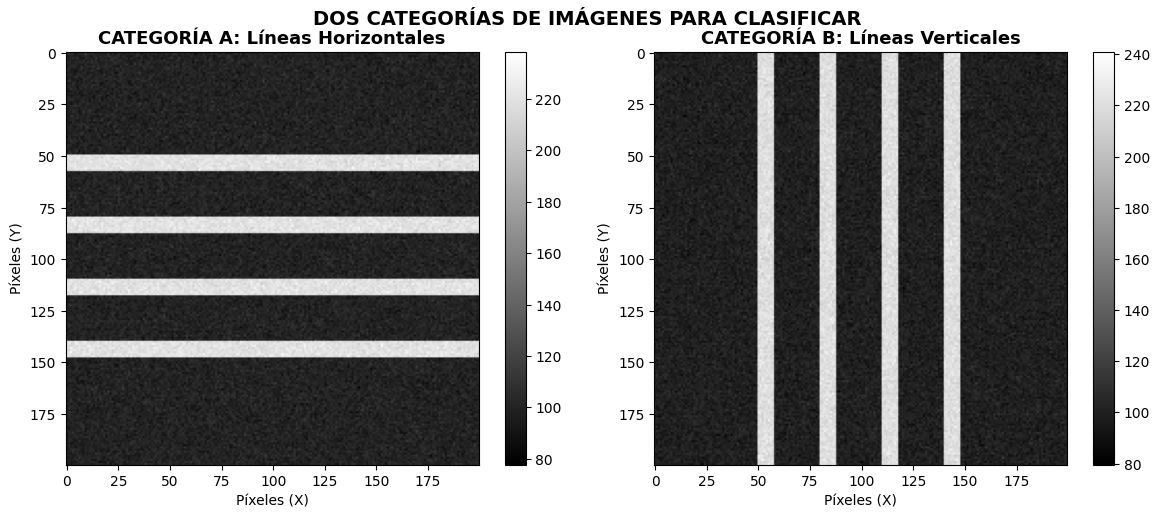

✓ Imágenes creadas:
  - Imagen A (Líneas Horizontales): (200, 200)
  - Imagen B (Líneas Verticales): (200, 200)


In [237]:
def crear_imagen_categoria_A(height=200, width=200, seed=42):
    """Crea una imagen que representa la CATEGORÍA A: Líneas Horizontales"""
    np.random.seed(seed)
    img = np.ones((height, width), dtype=np.float32) * 100
    
    # Agregar líneas horizontales claras
    for y in [50, 80, 110, 140]:
        img[y:y+8, :] = 220  # Líneas blancas
    
    # Agregar pequeño ruido gaussiano
    img += np.random.normal(0, 5, img.shape)
    
    return np.clip(img, 0, 255).astype(np.float32)

def crear_imagen_categoria_B(height=200, width=200, seed=43):
    """Crea una imagen que representa la CATEGORÍA B: Líneas Verticales"""
    np.random.seed(seed)
    img = np.ones((height, width), dtype=np.float32) * 100
    
    # Agregar líneas verticales claras
    for x in [50, 80, 110, 140]:
        img[:, x:x+8] = 220  # Líneas blancas
    
    # Agregar pequeño ruido gaussiano
    img += np.random.normal(0, 5, img.shape)
    
    return np.clip(img, 0, 255).astype(np.float32)

# Crear las imágenes
img_categoria_A = crear_imagen_categoria_A()
img_categoria_B = crear_imagen_categoria_B()

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im = axes[0].imshow(img_categoria_A, cmap='gray')
axes[0].set_title('CATEGORÍA A: Líneas Horizontales', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Píxeles (X)')
axes[0].set_ylabel('Píxeles (Y)')
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(img_categoria_B, cmap='gray')
axes[1].set_title('CATEGORÍA B: Líneas Verticales', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Píxeles (X)')
axes[1].set_ylabel('Píxeles (Y)')
plt.colorbar(im, ax=axes[1])

fig.suptitle('DOS CATEGORÍAS DE IMÁGENES PARA CLASIFICAR', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Imágenes creadas:")
print(f"  - Imagen A (Líneas Horizontales): {img_categoria_A.shape}")
print(f"  - Imagen B (Líneas Verticales): {img_categoria_B.shape}")

## Sección 2: Entender Kernels - Experimento Guiado

Vamos a entender cómo diferentes kernels responden a las características de nuestras imágenes.


📊 Aplicando convoluciones...



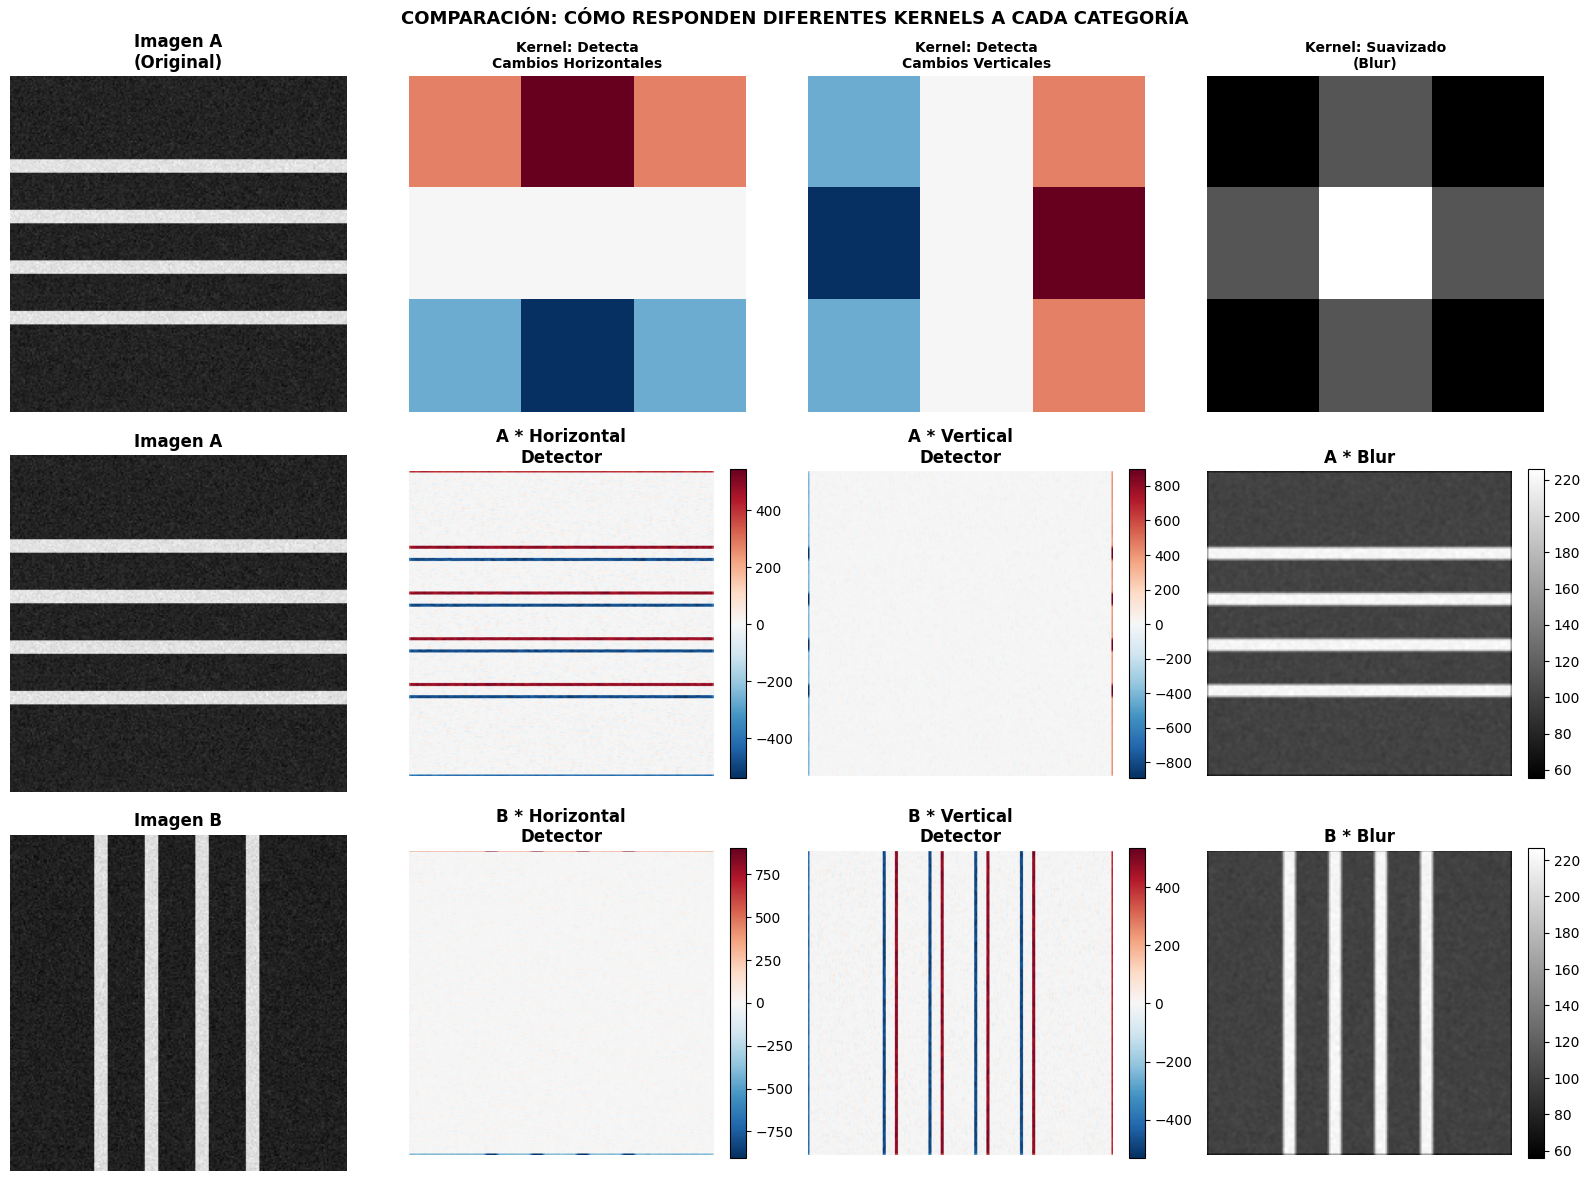


📈 ANÁLISIS DE RESPUESTAS:

Categoría A (Líneas Horizontales):
  - Detector Horizontal: Media=0.02, Max=546.36
  - Detector Vertical:   Media=0.00, Max=899.56
  - Suavizado:           Media=118.64, Max=226.11

Categoría B (Líneas Verticales):
  - Detector Horizontal: Media=-0.00, Max=903.87
  - Detector Vertical:   Media=0.02, Max=535.20
  - Suavizado:           Media=118.68, Max=226.62

✓ Observación: El detector de cambios horizontales responde MÁS a líneas horizontales
✓ Observación: El detector de cambios verticales responde MÁS a líneas verticales


In [238]:
# Definir algunos kernels básicos
kernel_detactor_horizontal = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
], dtype=np.float32)

kernel_detector_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

kernel_suavizado = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16

# Aplicar convoluciones
print("\n📊 Aplicando convoluciones...\n")

# Categoría A con diferentes filtros
A_horizontal = signal.convolve2d(img_categoria_A, kernel_detactor_horizontal, mode='same')
A_vertical = signal.convolve2d(img_categoria_A, kernel_detector_vertical, mode='same')
A_suavizado = signal.convolve2d(img_categoria_A, kernel_suavizado, mode='same')

# Categoría B con diferentes filtros
B_horizontal = signal.convolve2d(img_categoria_B, kernel_detactor_horizontal, mode='same')
B_vertical = signal.convolve2d(img_categoria_B, kernel_detector_vertical, mode='same')
B_suavizado = signal.convolve2d(img_categoria_B, kernel_suavizado, mode='same')

# Visualizar resultados
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Fila 1: Original
axes[0, 0].imshow(img_categoria_A, cmap='gray')
axes[0, 0].set_title('Imagen A\n(Original)', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(kernel_detactor_horizontal, cmap='RdBu_r')
axes[0, 1].set_title('Kernel: Detecta\nCambios Horizontales', fontweight='bold', fontsize=10)
axes[0, 1].axis('off')

axes[0, 2].imshow(kernel_detector_vertical, cmap='RdBu_r')
axes[0, 2].set_title('Kernel: Detecta\nCambios Verticales', fontweight='bold', fontsize=10)
axes[0, 2].axis('off')

axes[0, 3].imshow(kernel_suavizado, cmap='gray')
axes[0, 3].set_title('Kernel: Suavizado\n(Blur)', fontweight='bold', fontsize=10)
axes[0, 3].axis('off')

# Fila 2: Resultados Categoría A
axes[1, 0].imshow(img_categoria_A, cmap='gray')
axes[1, 0].set_title('Imagen A', fontweight='bold')
axes[1, 0].axis('off')

im = axes[1, 1].imshow(A_horizontal, cmap='RdBu_r')
axes[1, 1].set_title('A * Horizontal\nDetector', fontweight='bold')
axes[1, 1].axis('off')
plt.colorbar(im, ax=axes[1, 1], fraction=0.046)

im = axes[1, 2].imshow(A_vertical, cmap='RdBu_r')
axes[1, 2].set_title('A * Vertical\nDetector', fontweight='bold')
axes[1, 2].axis('off')
plt.colorbar(im, ax=axes[1, 2], fraction=0.046)

im = axes[1, 3].imshow(A_suavizado, cmap='gray')
axes[1, 3].set_title('A * Blur', fontweight='bold')
axes[1, 3].axis('off')
plt.colorbar(im, ax=axes[1, 3], fraction=0.046)

# Fila 3: Resultados Categoría B
axes[2, 0].imshow(img_categoria_B, cmap='gray')
axes[2, 0].set_title('Imagen B', fontweight='bold')
axes[2, 0].axis('off')

im = axes[2, 1].imshow(B_horizontal, cmap='RdBu_r')
axes[2, 1].set_title('B * Horizontal\nDetector', fontweight='bold')
axes[2, 1].axis('off')
plt.colorbar(im, ax=axes[2, 1], fraction=0.046)

im = axes[2, 2].imshow(B_vertical, cmap='RdBu_r')
axes[2, 2].set_title('B * Vertical\nDetector', fontweight='bold')
axes[2, 2].axis('off')
plt.colorbar(im, ax=axes[2, 2], fraction=0.046)

im = axes[2, 3].imshow(B_suavizado, cmap='gray')
axes[2, 3].set_title('B * Blur', fontweight='bold')
axes[2, 3].axis('off')
plt.colorbar(im, ax=axes[2, 3], fraction=0.046)

fig.suptitle('COMPARACIÓN: CÓMO RESPONDEN DIFERENTES KERNELS A CADA CATEGORÍA',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Estadísticas
print("\n📈 ANÁLISIS DE RESPUESTAS:")
print("\nCategoría A (Líneas Horizontales):")
print(f"  - Detector Horizontal: Media={A_horizontal.mean():.2f}, Max={A_horizontal.max():.2f}")
print(f"  - Detector Vertical:   Media={A_vertical.mean():.2f}, Max={A_vertical.max():.2f}")
print(f"  - Suavizado:           Media={A_suavizado.mean():.2f}, Max={A_suavizado.max():.2f}")

print("\nCategoría B (Líneas Verticales):")
print(f"  - Detector Horizontal: Media={B_horizontal.mean():.2f}, Max={B_horizontal.max():.2f}")
print(f"  - Detector Vertical:   Media={B_vertical.mean():.2f}, Max={B_vertical.max():.2f}")
print(f"  - Suavizado:           Media={B_suavizado.mean():.2f}, Max={B_suavizado.max():.2f}")

print("\n✓ Observación: El detector de cambios horizontales responde MÁS a líneas horizontales")
print("✓ Observación: El detector de cambios verticales responde MÁS a líneas verticales")

## Sección 3: 🎯 EJERCICIO 1 - Crear tu Propio Kernel

Ahora es tu turno de crear kernels que mejor distingan entre las dos categorías.

**Instrucciones:**
1. Define un kernel de 3×3 que creas que será útil
2. Pruébalo en ambas imágenes
3. Analiza qué características detecta
4. Ajusta los valores si es necesario

# DATASET

## PERRO

In [239]:
import cv2
import random
perros = "/home/carlos/Documents/VISION COMPUTACIONAL/LABS/Computer_Vision/Datasets/Dog_reduced"
#extraer las 10 imagenes random de la carpeta de perros
images_perro = []
for i in random.sample(range(1, 100), 10):
    img = cv2.imread(f"{perros}/{i}.jpg", cv2.IMREAD_GRAYSCALE)
    images_perro.append(img)

print(images_perro[1].shape)

(375, 500)


In [240]:
#promedio de altura y ancho de las imagenes de perros
total_height = 0
total_width = 0
for img in images_perro:
    h, w = img.shape
    total_height += h
    total_width += w
avg_height = total_height // len(images_perro)
avg_width = total_width // len(images_perro)
print(f"Promedio de tamaño de imágenes de perros: {avg_height}x{avg_width}")

Promedio de tamaño de imágenes de perros: 361x460


In [241]:
#redimensionar las imagenes de perros al minimo tamaño
scale_percent = 60
width= int(avg_width *scale_percent /100)
height= int(avg_height *scale_percent /100)
dimension = (width, height)
for i in range(len(images_perro)):
    images_perro[i] = cv2.resize(images_perro[i], dimension, interpolation=cv2.INTER_AREA)
print(images_perro[3].shape)

(216, 276)


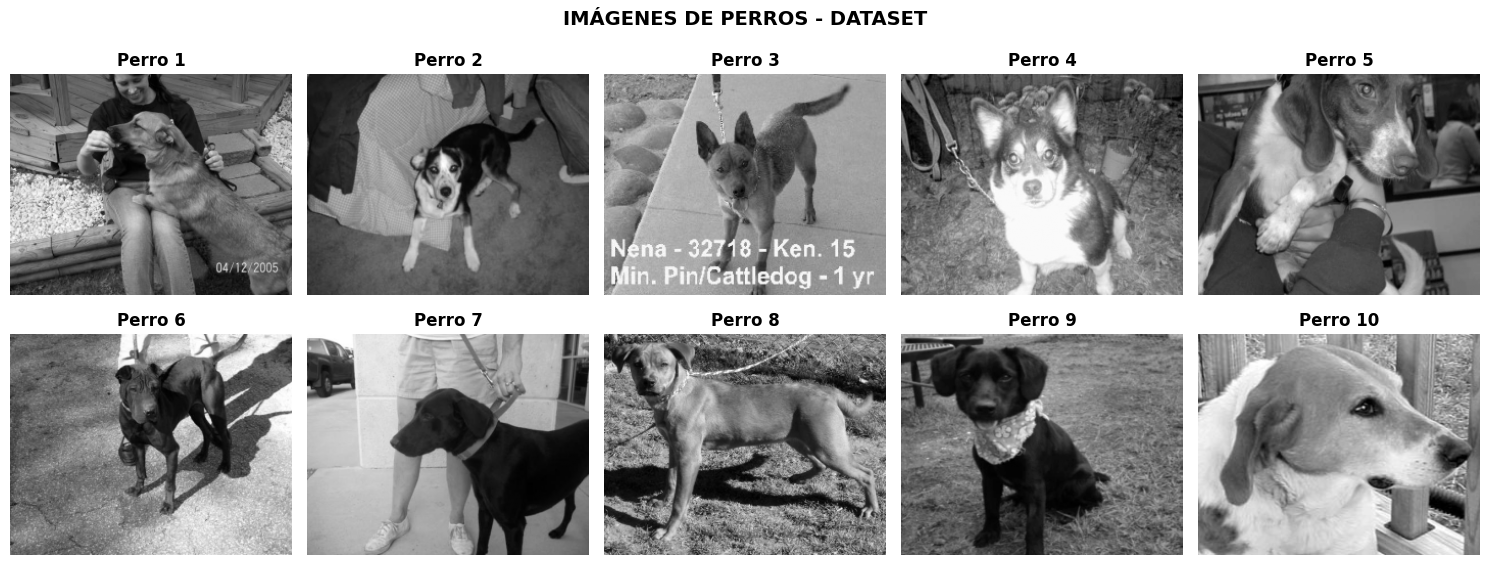

In [242]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_perro[i], cmap='gray')
    ax.set_title(f'Perro {i+1}', fontweight='bold')
    ax.axis('off')
fig.suptitle('IMÁGENES DE PERROS - DATASET', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## ÁRBOLES

In [243]:
arboles = "/home/carlos/Documents/VISION COMPUTACIONAL/LABS/Computer_Vision/Datasets/Trees"
#extraer las 10 imagenes random de la carpeta de arboles
images_arbol = []
for i in range(10):
    img2 = cv2.imread(f"{arboles}/{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    images_arbol.append(img2)
print(images_arbol[0].shape)

(1200, 1600)


In [244]:
#redimensionar las imagenes de arboles al minimo tamaño
for i in range(len(images_arbol)):
    images_arbol[i] = cv2.resize(images_arbol[i], dimension, interpolation=cv2.INTER_AREA)
print(images_arbol[2].shape)

(216, 276)


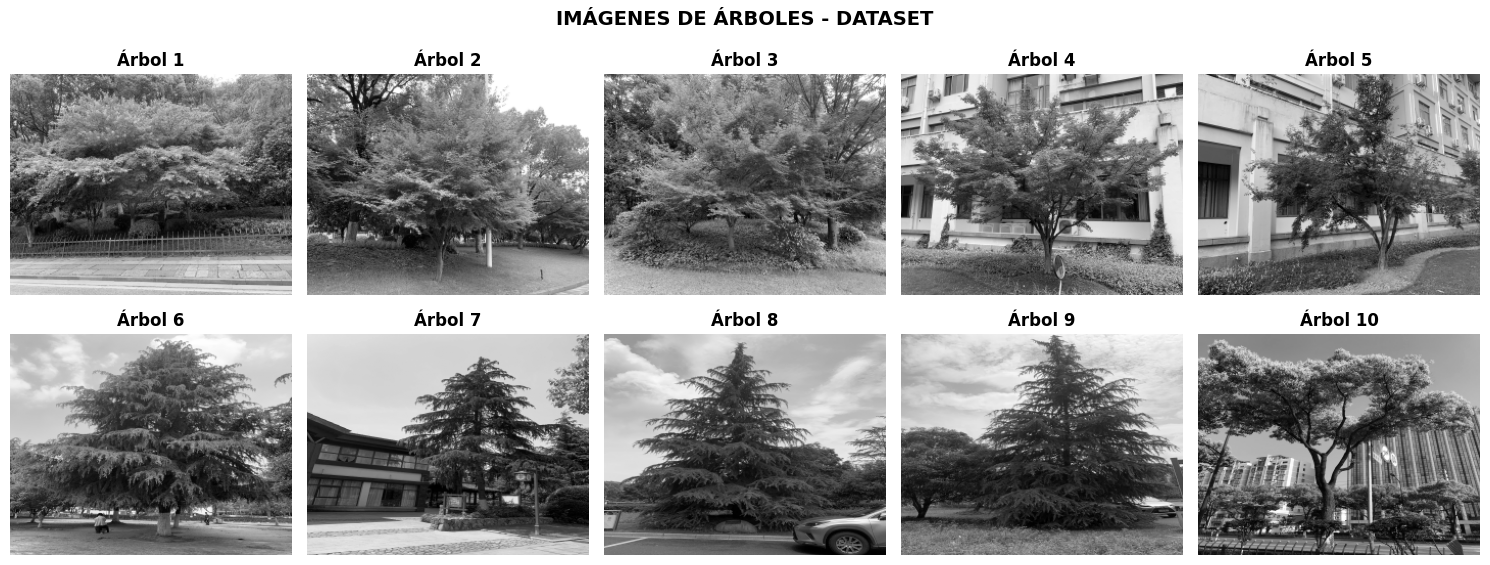

In [245]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_arbol[i], cmap='gray')
    ax.set_title(f'Árbol {i+1}', fontweight='bold')
    ax.axis('off')
fig.suptitle('IMÁGENES DE ÁRBOLES - DATASET', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [246]:
def embedding_kernel(imagenes,kernel):
    img_kernel = signal.convolve2d(imagenes, kernel, mode='same')
    mag = np.abs(img_kernel)
    mag_mean = mag.mean()
    mag_std = mag.std()
    mag_p90 = np.percentile(mag,90)

    embedding = np.concatenate([
        [mag_mean,mag_std,mag_p90]
    ])
    return embedding

In [247]:
def normalizar_images(imagenes):
    imagenes_normalizadas = []
    for img in imagenes:
        img_min = img.min()
        img_max = img.max()
        img_normalizada = (img - img_min) / (img_max - img_min)
        imagenes_normalizadas.append(img_normalizada)
    return imagenes_normalizadas

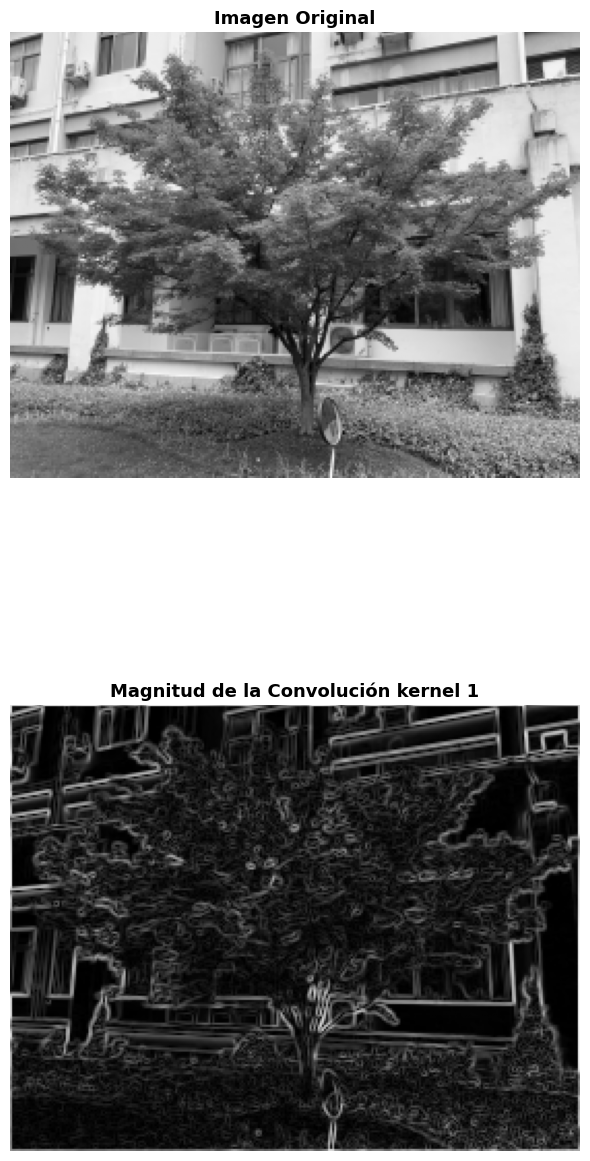

In [248]:
mi_kernel_1 = np.array([
    [-1-1j,  0-2j,  1-1j],
    [-2+0j,  0+0j,  2+0j],
    [-1+1j,  0+2j,  1+1j]
])

img_kernel_1 = signal.convolve2d(images_arbol[3], mi_kernel_1, mode='same')

fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,15))
ax_orig.imshow(images_arbol[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_1), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución kernel 1', fontweight='bold', fontsize=13)
ax_mag.axis('off')

plt.tight_layout()
plt.show()


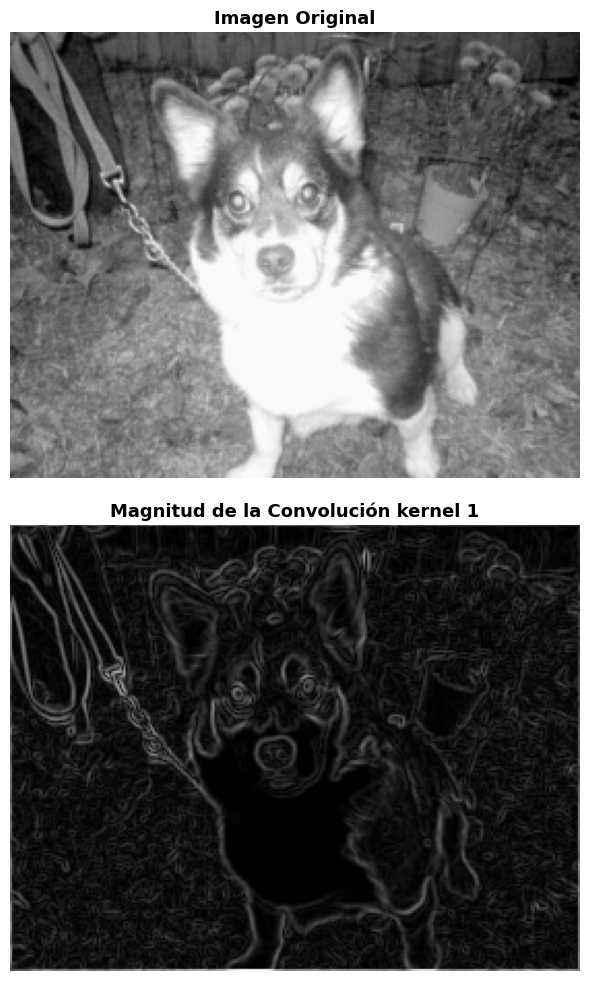

In [249]:

img_kernel_2 = signal.convolve2d(images_perro[3], mi_kernel_1, mode='same')

fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,10))
ax_orig.imshow(images_perro[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_2), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución kernel 1', fontweight='bold', fontsize=13)
ax_mag.axis('off')
plt.tight_layout()
plt.show()


In [250]:
embedding_arboles_kernel_1 = []
labels_arboles = []
images_arbol = normalizar_images(images_arbol)
for i in range(len(images_arbol)):
    embedding_1 = embedding_kernel(images_arbol[i], mi_kernel_1)
    embedding_1 = embedding_kernel(images_arbol[i], mi_kernel_1)

    #embedding_1 = embedding_kernel(images_arbol[i], mi_kernel_2)
    labels_arboles.append(1)
    embedding_arboles_kernel_1.append(embedding_1)

embedding_perro_kernel_1 = []
labels_perros = []
images_perro = normalizar_images(images_perro)
for i in range(len(images_perro)):
    embedding_1 = embedding_kernel(images_perro[i], mi_kernel_1)
    embedding_1 = embedding_kernel(images_perro[i], mi_kernel_1)

    #embedding_1 = embedding_kernel(images_perro[i], mi_kernel_2)
    labels_perros.append(0)
    embedding_perro_kernel_1.append(embedding_1)

## Sección 4: 🎯 EJERCICIO 2 - Crear un Segundo Kernel

Crea un segundo kernel complementario que capture otras características.

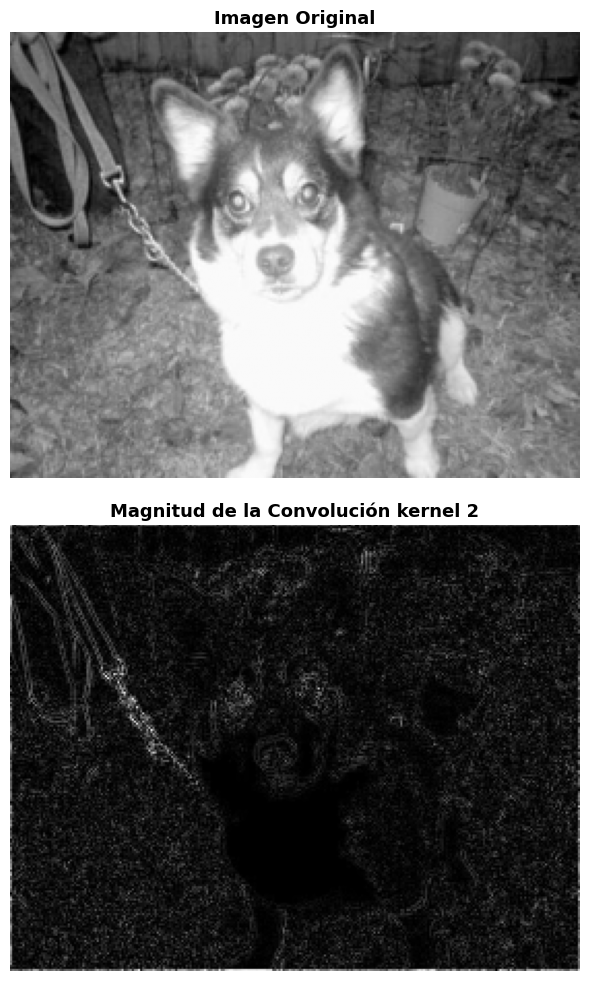

In [251]:
mi_kernel_2 = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])
img_kernel_2 = signal.convolve2d(images_perro[3], mi_kernel_2, mode='same')
img_kernel_2_2 = signal.convolve2d(images_perro[3], mi_kernel_2, mode='same')

fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,10))
ax_orig.imshow(images_perro[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_2), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución kernel 2', fontweight='bold', fontsize=13)
ax_mag.axis('off')
plt.tight_layout()
plt.show()


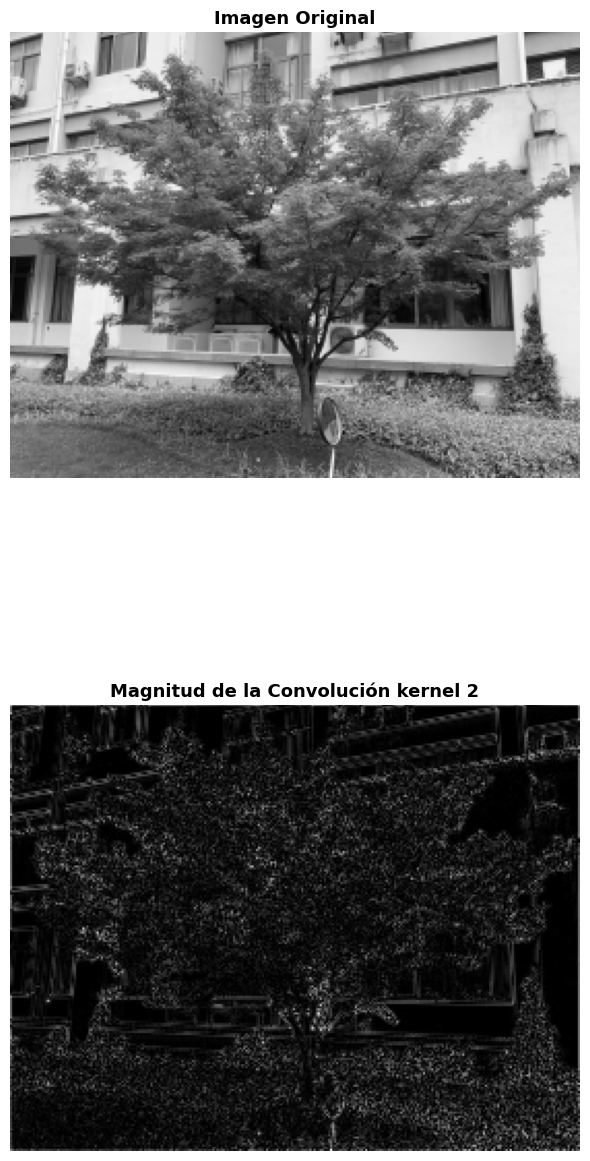

In [252]:
img_kernel_2 = signal.convolve2d(images_arbol[3], mi_kernel_2, mode='same')

fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,15))
ax_orig.imshow(images_arbol[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_2), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución kernel 2', fontweight='bold', fontsize=13)
ax_mag.axis('off')

plt.tight_layout()
plt.show()


In [253]:
embedding_perro_kernel_2 = []

images_perro = normalizar_images(images_perro)
for i in range(len(images_perro)):
    embedding_2 = embedding_kernel(images_perro[i], mi_kernel_2)
    embedding_perro_kernel_2.append(embedding_2)


embedding_arboles_kernel_2 = []
images_arbol = normalizar_images(images_arbol)
for i in range(len(images_arbol)):
    embedding_2 = embedding_kernel(images_arbol[i], mi_kernel_2)
    embedding_arboles_kernel_2.append(embedding_2)

In [254]:
Tree_kernel_1 = np.sum(embedding_arboles_kernel_1[0]**2)
Dog_kernel_1 = np.sum(embedding_perro_kernel_1[0]**2) 

Tree_kernel_2 = np.sum(embedding_arboles_kernel_2[0]**2)
Dog_kernel_2 = np.sum(embedding_perro_kernel_2[0]**2)


## Sección 5: 🎯 EJERCICIO 3 - Crear un Clasificador Simple

Combina tus dos kernels para crear un clasificador básico que distinga entre las dos categorías.

In [255]:
Dataset = np.array(embedding_arboles_kernel_1[1 :] + embedding_perro_kernel_1[1 :])
Y = np.array(labels_arboles[1 :] + labels_perros[1 :])

Dataset_kernel_1 = Dataset
Dataset_kernel_2 = np.array(embedding_arboles_kernel_2[1 :] + embedding_perro_kernel_2[1 :])


In [256]:
test_kernel_1 = []
for i in range(len(Dataset_kernel_1)):
    X = np.sum(Dataset_kernel_1[i]**2)
    predict_tree = abs(X - Tree_kernel_1)
    predict_dog = abs(X - Dog_kernel_1)
    if (predict_tree ) < predict_dog:
        clase = "Árbol"
        test_kernel_1.append(1)
    else:
        clase = "Perro"
        test_kernel_1.append(0)
    

In [257]:
test_kernel_2 = []
for i in range(len(Dataset_kernel_2)):
    X = np.sum(Dataset_kernel_2[i]**2)
    predict_tree = abs(X - Tree_kernel_2)
    predict_dog = abs(X - Dog_kernel_2)
    if (predict_tree ) < predict_dog:
        clase = "Árbol"
        test_kernel_2.append(1)
    else:
        clase = "Perro"
        test_kernel_2.append(0)

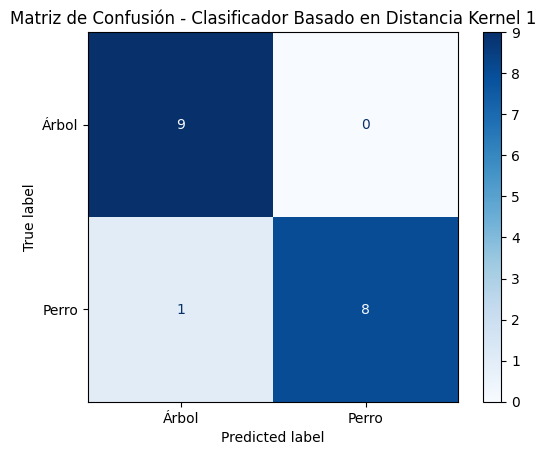

In [258]:
#realizar matriz de confusion test y Y
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y, test_kernel_1, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Árbol', 'Perro'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Clasificador Basado en Distancia Kernel 1')
plt.show()

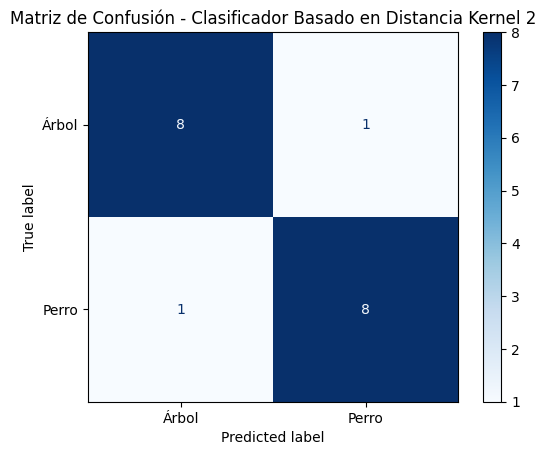

In [259]:
#realizar matriz de confusion test y Y
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y, test_kernel_2, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Árbol', 'Perro'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Clasificador Basado en Distancia Kernel 2')
plt.show()

In [260]:
#calcular accuracy 
correct = 0
for i in range(len(test_kernel_1)):
    if test_kernel_1[i] == Y[i]:
        correct += 1
accuracy = correct / len(test_kernel_1) * 100
print(f"Accuracy kernel 1: {accuracy:.2f}%")

Accuracy kernel 1: 94.44%


In [261]:
#calcular accuracy 
correct = 0
for i in range(len(test_kernel_2)):
    if test_kernel_2[i] == Y[i]:
        correct += 1
accuracy = correct / len(test_kernel_2) * 100
print(f"Accuracy kernel 2: {accuracy:.2f}%")

Accuracy kernel 2: 88.89%


## Sección 6: 📊 Visualizar el Espacio de Características

Veamos cómo tus kernels transforman las imágenes en un "espacio de características".

## ÁRBOL

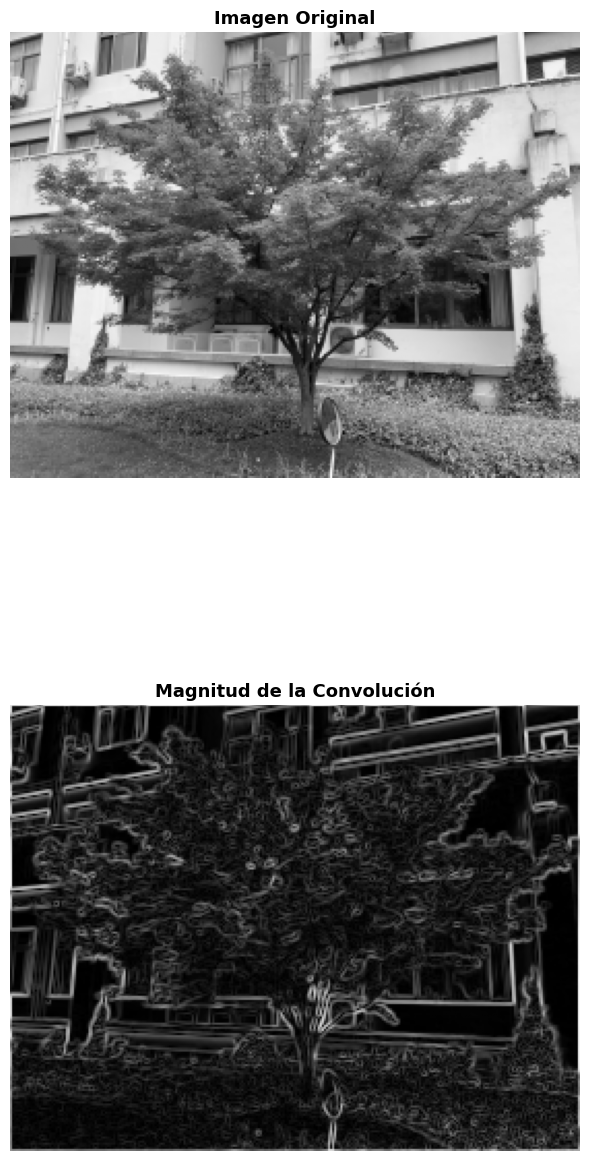

In [262]:

fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,15))
ax_orig.imshow(images_arbol[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_1), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución', fontweight='bold', fontsize=13)
ax_mag.axis('off')
plt.tight_layout()
plt.show()

## PERRO

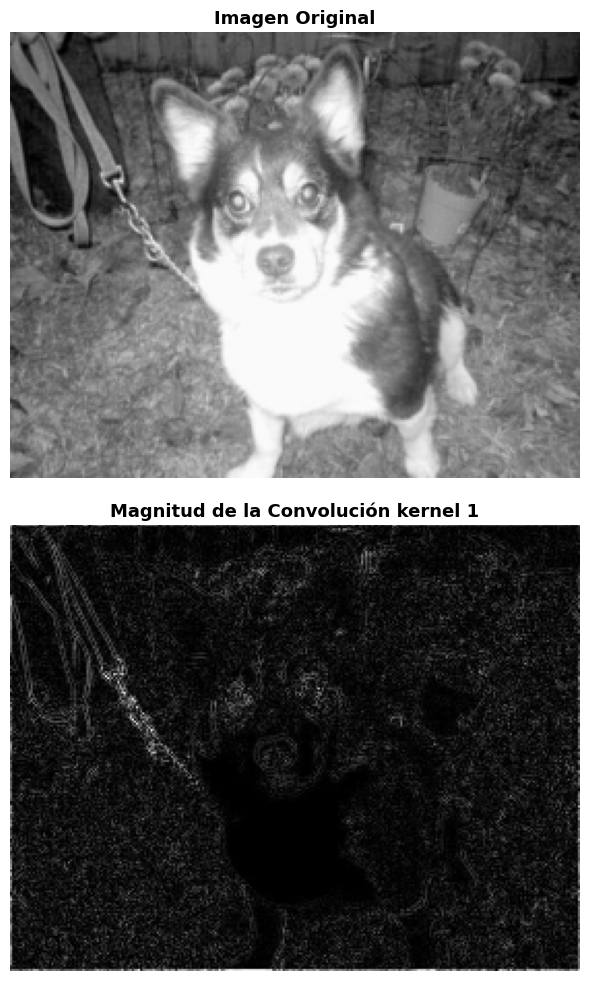

In [263]:
fig, (ax_orig,ax_mag) = plt.subplots(2,1,figsize=(6,10))
ax_orig.imshow(images_perro[3], cmap='gray')
ax_orig.set_title('Imagen Original', fontweight='bold', fontsize=13)
ax_orig.axis('off')
ax_mag.imshow(np.abs(img_kernel_2_2), cmap='gray')
ax_mag.set_title('Magnitud de la Convolución kernel 1', fontweight='bold', fontsize=13)
ax_mag.axis('off')
plt.tight_layout()
plt.show()


## 📝 SECCIÓN 7: INFORME FINAL

Completa este informe explicando tu trabajo:

### Responde las siguientes preguntas:

**1. ¿Qué valores pusiste en tu Kernel 1 y por qué?**

```
Mi Kernel 1:
[ -1-1j,   0-2j,   1-1j ]
[ -2+0j,   0+0j,   2+0j ]
[ -1+1j,   0+2j,   1+1j ]

Razón:
Es un detector de bordes tipo Sobel : mezcla gradiente horizontal (parte real)
y vertical (parte imaginaria). Al tomar la magnitud, resalta cambios de intensidad
en varias direcciones, lo que ayuda a capturar textura/contornos.

```

---

**2. ¿Qué valores pusiste en tu Kernel 2 y por qué?**

```
Mi Kernel 2:
[  0, -1,  0 ]
[ -1,  4, -1 ]
[  0, -1,  0 ]

Razón:
Es un Laplaciano. Resalta bordes y cambios bruscos alrededor de contornos,
y suele responder fuerte a siluetas/contornos marcados.

```

---

**3. ¿Cómo funciona tu clasificador?**

```
Primero, el clasificador convoluciona cada imagen con un kernel y calcula la magnitud de la respuesta.
A partir de esa magnitud se construye un embedding de tres valores: media, desviación estándar y
percentil 90. Luego, ese embedding se aplcia la norma L2,
que se compara con la clase Árbol y Perro para decidir la clasificación según
la distancia.

```

---

**4. ¿Qué patrones detecta cada kernel?**

```
Kernel 1 detecta:
Bordes y orientaciones en múltiples direcciones, ya que es sensible a cambios de intensidad tanto
horizontales como verticales. Esto lo hace especialmente útil para capturar texturas y estructuras
complejas, como ramas y hojas.

Kernel 2 detecta:
Cambios bruscos de intensidad asociados a contornos y bordes, sin favorecer una orientación específica.
Tiende a resaltar líneas de borde y regiones donde la intensidad varía rápidamente.

```

---

**5. Si tu clasificador no fue 100% acertado, ¿qué cambiarías?**

```
Se utilizarían ambos kernels para todas las imágenes y se combinarían sus características
(3 del kernel 1 y 3 del kernel 2) en un solo vector de seis elementos.
Además, se normalizarían los embeddings antes de compararlos.
En lugar de usar un solo ejemplo como prototipo, se emplearía el promedio o la mediana de cada clase.

```

---

**6. Conexión con CNNs: ¿Cómo se relaciona esto con redes neuronales convolucionales?**

```
Este ejercicio representa una versión simplificada de una red neuronal convolucional construida
manualmente. Los kernels funcionan como filtros de convolución que generan mapas de activación.
En una CNN real, estos filtros no se definen a mano, sino que se aprenden durante el entrenamiento.
El uso de múltiples kernels equivale a generar varios canales de características que luego son
utilizados por capas posteriores para realizar la clasificación.
```

---

### Lo que aprendiste:

1. ✅ **Un filtro (kernel) es una pequeña matriz** que detecta patrones específicos
2. ✅ **Diferentes kernels detectan diferentes características** (bordes horizontales, verticales, etc.)
3. ✅ **La convolución es el producto punto** entre el kernel y la región de la imagen
4. ✅ **Múltiples kernels pueden combinarse** para crear un clasificador
5. ✅ **En CNNs, el sistema APRENDE automáticamente** qué kernels son útiles

### Próxima clase:
Ahora que entiendes filtros, veremos cómo **redes neuronales convolucionales** usan capas de convolución para extraer características automáticamente y resolver problemas complejos de visión por computadora.

---

**Entrega:**
- [ ] Este notebook completado con todas las secciones
- [ ] Informe final rellenado
- [ ] Los kernels que creaste y explicación de su funcionamiento
- [ ] Curso en DataCAmp